In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt
from time import time

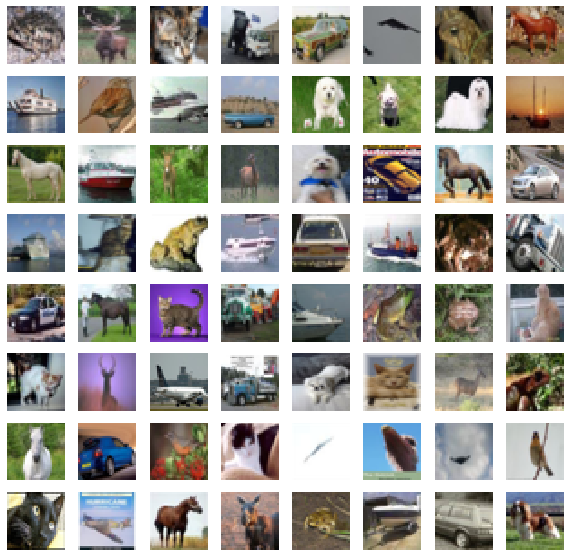

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle 

rows = 8
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x = x_train.astype("uint8")

fig, axes1 = plt.subplots(rows,rows,figsize=(10,10))
for j in range(rows):
    for k in range(rows):
        index = np.random.choice(range(len(x)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x[index:index+1][0])

In [0]:
class cifar10vgg:

    # This is the VGG16 model architecture
    def build_model(self):
    
        weight_decay = 0.0005
        model = Sequential()
        x_shape = [32,32,3]
        num_classes = 10


        model.add(Conv2D(64, (3, 3), padding='same',input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))  #relu activation function
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))

        model.add(Flatten())
        model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Dropout(0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        return model


In [13]:
from keras.utils import to_categorical
model = cifar10vgg()
model = model.build_model()
batch_size = 128
maxepoches = 100
learning_rate = 0.1
learning_decay = 1e-6
learning_drop = 20
num_classes = 10


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train =to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

def learning_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // learning_drop))
reduce_learning = keras.callbacks.LearningRateScheduler(learning_scheduler)

        #data augmentation
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
        # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

        #optimization details
sgd = optimizers.SGD(lr=learning_rate, decay=learning_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

        # training process 
time1 = time()
historytemp = model.fit_generator(datagen.flow(x_train, y_train,
                                         batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=maxepoches,
                            validation_data=(x_test, y_test),callbacks=[reduce_learning],verbose=2)
time2 = time()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
 - 37s - loss: 24.5339 - acc: 0.2015 - val_loss: 22.6410 - val_acc: 0.1053
Epoch 2/100
 - 28s - loss: 14.0940 - acc: 0.2598 - val_loss: 10.7696 - val_acc: 0.2008
Epoch 3/100
 - 28s - loss: 8.4833 - acc: 0.2446 - val_loss: 8.8504 - val_acc: 0.1058
Epoch 4/100
 - 27s - loss: 6.3844 - acc: 0.2628 - val_loss: 5.8732 - val_acc: 0.1412
Epoch 5/100
 - 27s - loss: 4.2574 - acc: 0.3429 - val_loss: 4.2525 - val_acc: 0.1624
Epoch 6/100
 - 27s - loss: 2.8467 - acc: 0.4176 - val_loss: 3.1144 - val_acc: 0.2665
Epoch 7/100
 - 28s - loss: 2.1506 - acc: 0.4837 - val_loss: 2.2293 - val_acc: 0.4264
Epoch 8/100
 - 27s - loss: 1.8176 - acc: 0.5445 - val_loss: 1.8067 - val_acc: 0.5404
Epoch 9/100
 - 27s - loss: 1.6655 - acc: 0.5904 - val_loss: 1.8588 - val_acc: 0.5406
Epoch 

In [14]:
print(f'time taken for traing the model is {time2-time1} second')

time taken for traing the model is 2747.1426441669464 second


In [15]:
  # evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('Testing accuracy %.3f' % (acc * 100.0))

Testing accuracy 90.210
